In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [321]:
produksi = pd.read_csv("C:/Users/fawaz/Documents/karangantuwqwwdsadada.csv")
tangkap = pd.read_csv("C:/Users/fawaz/Documents/alattangkap_ppnkarangantu.csv")
tahun = pd.read_csv("C:/Users/fawaz/Documents/pertahun_produksi.csv")

In [322]:
produksi.head()

,Unnamed: 0,years,category,type,produksi*kg
0,1,2021,demersal,layur,392
1,2,2021,pelagis_kecil,layang,6750
2,3,2021,pelagis_kecil,siro,14190
3,4,2021,pelagis_kecil,teri,287802
4,5,2021,pelagis_besar,tenggiri,30846


In [323]:
produksi.drop("Unnamed: 0", axis=1, inplace=True)

In [324]:
produksi.head()

,years,category,type,produksi*kg
0,2021,demersal,layur,392
1,2021,pelagis_kecil,layang,6750
2,2021,pelagis_kecil,siro,14190
3,2021,pelagis_kecil,teri,287802
4,2021,pelagis_besar,tenggiri,30846


In [ ]:
produksi.dtypes

years           int64
category       object
type           object
produksi*kg     int64
dtype: object

In [ ]:
produksi.category.unique()

array(['demersal', 'pelagis_kecil', 'pelagis_besar', 'ikan_karang'],
      dtype=object)

In [ ]:
produksi['category'] = produksi['category'].map({'pelagis_kecil': 0, 'pelagis_besar': 0, 
                                    "ikan_karang" : 1, "demersal" : 2, "multi_air_tawar" : 2})

In [ ]:
produksi.head()

,years,category,type,produksi*kg
0,2021,2,layur,392
1,2021,0,layang,6750
2,2021,0,siro,14190
3,2021,0,teri,287802
4,2021,0,tenggiri,30846


In [ ]:
produksi.dtypes

years           int64
category        int64
type           object
produksi*kg     int64
dtype: object

In [ ]:
produksi.isna().sum()

years          0
category       0
type           0
produksi*kg    0
dtype: int64

In [ ]:
produksi.fillna(produksi.median(), inplace=True)

In [ ]:
produksi.isna().sum()

years          0
category       0
type           0
produksi*kg    0
dtype: int64

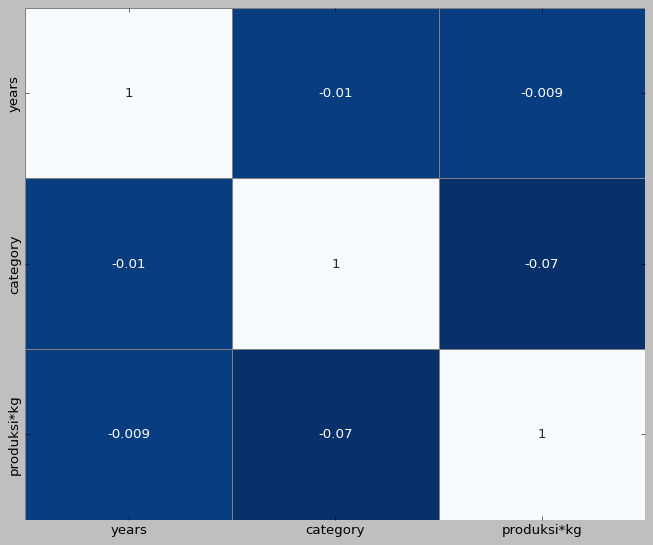

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(produksi.corr(), annot=True, fmt='.1g', cmap="Blues_r", cbar=False, linewidths=0.5, linecolor='grey');

In [ ]:
print ('Total pelagis : {} '.format(produksi.category.value_counts()[0]))
print ('Total ikan karang : {} '.format(produksi.category.value_counts()[2]))
print ('Total demersal : {} '.format(produksi.category.value_counts()[1]))

Total pelagis : 124 
Total ikan karang : 102 
Total demersal : 16 


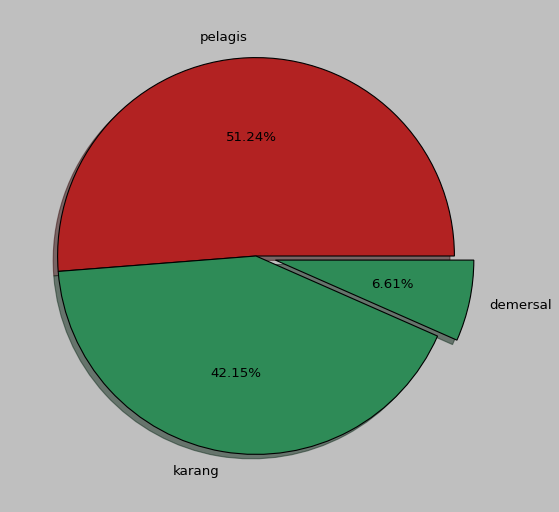

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

plt.pie(x=produksi["category"].value_counts(), 
        colors=["firebrick","seagreen","seagreen"], 
        labels=["pelagis","karang","demersal"], 
        shadow = True, 
        autopct="%1.2f%%",
        explode = (0, 0, 0.1)
        )

plt.show()

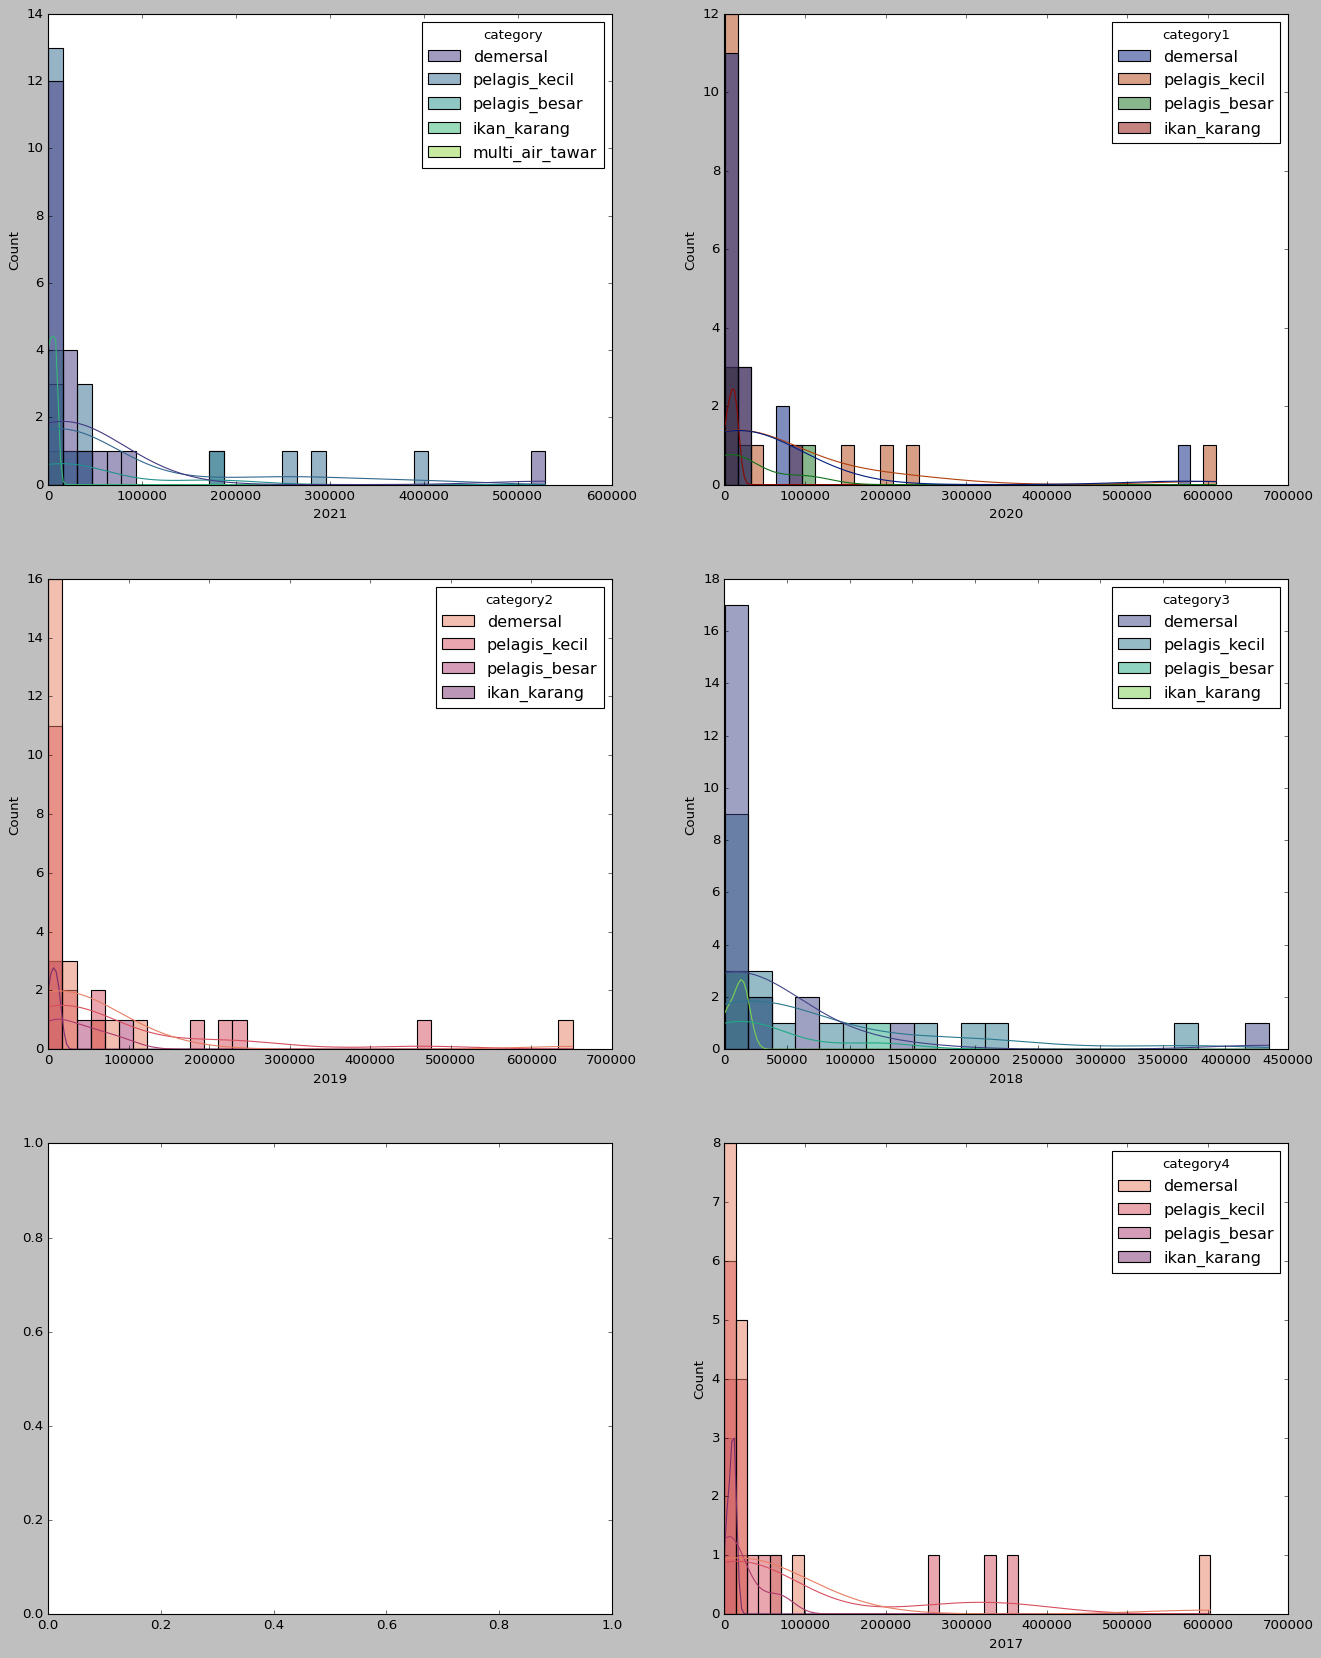

In [ ]:
fig, ax =plt.subplots(3,2, figsize=(20,25)) 
plt.style.use("classic")


sns.histplot(x = tahun["2021"], hue = tahun["category"], palette="viridis", kde=True, ax=ax[0,0]);
sns.histplot(x = tahun["2020"], hue = tahun["category1"], palette="dark", kde=True, ax=ax[0,1]);
sns.histplot(x = tahun["2019"], hue = tahun["category2"], palette="flare", kde=True, ax=ax[1,0]);
sns.histplot(x = tahun["2018"], hue = tahun["category3"], palette="viridis", kde=True, ax=ax[1,1]);
sns.histplot(x = tahun["2017"], hue = tahun["category4"], palette="flare", kde=True, ax=ax[2,1]);

In [ ]:
produksi = pd.read_csv("C:/Users/fawaz/Documents/karangantu.csv")

In [ ]:
produksi.head()

,Unnamed: 0,years,category,type,produksi*kg
0,1,2021,demersal,layur,392
1,2,2021,pelagis_kecil,layang,6750
2,3,2021,pelagis_kecil,siro,14190
3,4,2021,pelagis_kecil,teri,287802
4,5,2021,pelagis_besar,tenggiri,30846


In [ ]:
del produksi['type']

In [ ]:
produksi['category'] = produksi['category'].map({'pelagis_kecil': 0, 'pelagis_besar': 0, 
                                    "ikan_karang" : 1, "demersal" : 1})

In [ ]:
# X data
X = produksi.drop("category", axis=1)
X.head()

,Unnamed: 0,years,produksi*kg
0,1,2021,392
1,2,2021,6750
2,3,2021,14190
3,4,2021,287802
4,5,2021,30846


In [ ]:
# y data
y = produksi["produksi*kg"]
y.head()

0       392
1      6750
2     14190
3    287802
4     30846
Name: produksi*kg, dtype: int64

In [ ]:
produksi.dtypes

Unnamed: 0     int64
years          int64
category       int64
produksi*kg    int64
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test)

(193, 49)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
RandomForestClassifierScore = rfc.score(X_test,y_test)
print("Accacy obtained by Random Forest Classifier :", RandomForestClassifierScore*100)

Accacy obtained by Random Forest Classifier : 2.0408163265306123


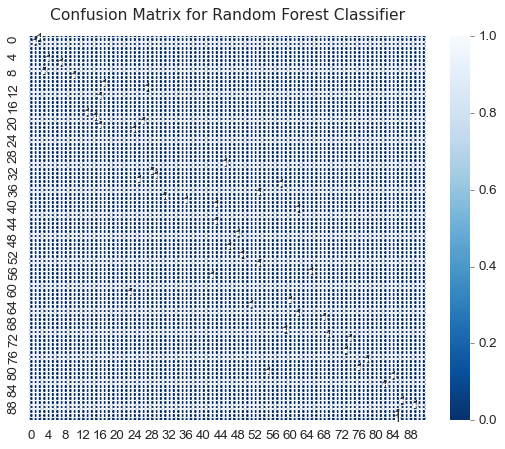

In [ ]:
# Confusion Matrix of Random Forest Classifier
from sklearn.metrics import confusion_matrix, classification_report
sns.set_style("white")

y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.56      0.61      0.58        23
           1       0.62      0.58      0.60        26

    accuracy                           0.59        49
   macro avg       0.59      0.59      0.59        49
weighted avg       0.59      0.59      0.59        49



In [ ]:
## Support Vector Machine
#Data wajib di scalling sebelum di training
#Untuk sementara kernel yang cocok adalah rbf dengan akurasi yang tinggi dan confusion matrix yang bagus

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

svm_score = model.score(X_train, y_train)
print(svm_score*100)

61.13989637305699


In [ ]:
# Tuning Parameter with Grid Search CV
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear', 'poly']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print("Best Prams : ",grid.best_params_)

# print how our model looks after hyper-parameter tuning
print("Best Estimator : ",grid.best_estimator_)

grid_score = grid.score(X_train, y_train)
print(grid_score*100)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.513 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.513 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.538 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.513 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.538 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.436 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.526 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.526 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.564 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

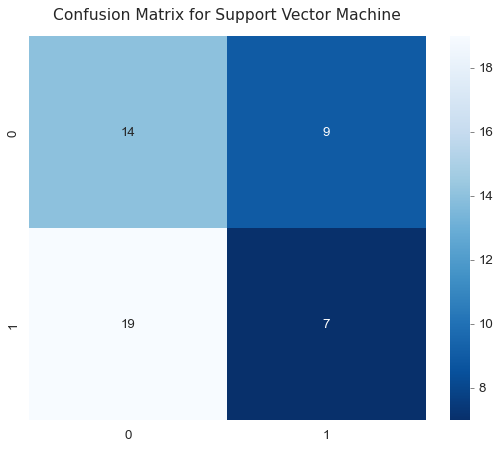

In [ ]:
# Confusion Matrix of SVM
from sklearn.metrics import confusion_matrix, classification_report
sns.set_style("white")

y_pred_svm = model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Support Vector Machine", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.42      0.61      0.50        23
           1       0.44      0.27      0.33        26

    accuracy                           0.43        49
   macro avg       0.43      0.44      0.42        49
weighted avg       0.43      0.43      0.41        49



In [ ]:
model.support_vectors_

array([[ 1.23322317e+00, -1.50911928e+00, -2.10030029e-01],
       [ 5.33830488e-01, -7.82785065e-01, -3.24957642e-01],
       [-5.44399894e-01,  6.69883373e-01, -3.80688201e-01],
       [-9.66949639e-01,  6.69883373e-01, -3.92314289e-01],
       [ 5.92113212e-01, -7.82785065e-01,  2.16286528e-01],
       [ 1.56834883e+00, -1.50911928e+00, -3.96029660e-01],
       [ 4.75547765e-01, -7.82785065e-01,  2.82309011e+00],
       [-3.54981043e-01,  6.69883373e-01, -4.55484478e-01],
       [ 1.58291951e+00, -1.50911928e+00, -9.13870458e-02],
       [ 4.60977084e-01, -7.82785065e-01,  9.97705410e-01],
       [-2.52986277e-01, -5.64508460e-02, -1.14203688e-01],
       [-6.17253298e-01,  6.69883373e-01,  1.30199249e+00],
       [-1.98553837e-02, -5.64508460e-02, -4.48462605e-01],
       [-1.07279469e-01, -5.64508460e-02, -4.46409374e-01],
       [-1.69548368e+00,  1.39621759e+00, -1.37304760e-01],
       [-9.52378958e-01,  6.69883373e-01,  4.97121429e+00],
       [ 3.84273396e-02, -5.64508460e-02

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, p=1)

In [ ]:
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print(knn_score*100)

46.93877551020408


              precision    recall  f1-score   support

           0       0.44      0.52      0.48        23
           1       0.50      0.42      0.46        26

    accuracy                           0.47        49
   macro avg       0.47      0.47      0.47        49
weighted avg       0.47      0.47      0.47        49



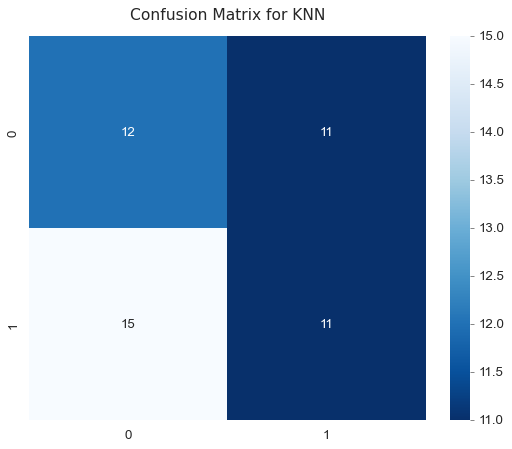

In [ ]:
# Confusion Matrix of KNN
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
sns.set_style("white")

y_pred_knn = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for KNN", fontsize=14, fontname="Helvetica", y=1.03);

print(metrics.classification_report(y_test, y_pred_knn))

In [ ]:
# Decision Tree
# proses klasifikasi
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# training data
clf = clf.fit(X_train, y_train)

# menampilkan akurasi
print("Akurasi : ",clf.score(X_test, y_test)*100)

Akurasi :  67.3469387755102


              precision    recall  f1-score   support

           0       0.65      0.65      0.65        23
           1       0.69      0.69      0.69        26

    accuracy                           0.67        49
   macro avg       0.67      0.67      0.67        49
weighted avg       0.67      0.67      0.67        49



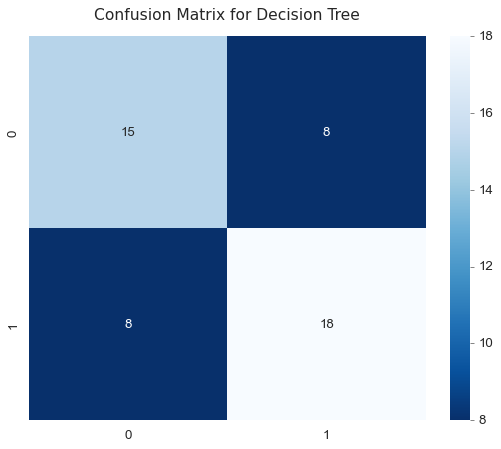

In [ ]:
# Confusion Matrix of DT
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
sns.set_style("white")

y_pred_dt = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Decision Tree", fontsize=14, fontname="Helvetica", y=1.03)

print(metrics.classification_report(y_test, y_pred_dt))

In [ ]:
#mlp
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), activation='relu',random_state=1, max_iter=500).fit(X_train, y_train)

In [ ]:
print(mlp.score(X_test, y_test)*100)

53.06122448979592


              precision    recall  f1-score   support

           0       0.50      0.74      0.60        23
           1       0.60      0.35      0.44        26

    accuracy                           0.53        49
   macro avg       0.55      0.54      0.52        49
weighted avg       0.55      0.53      0.51        49



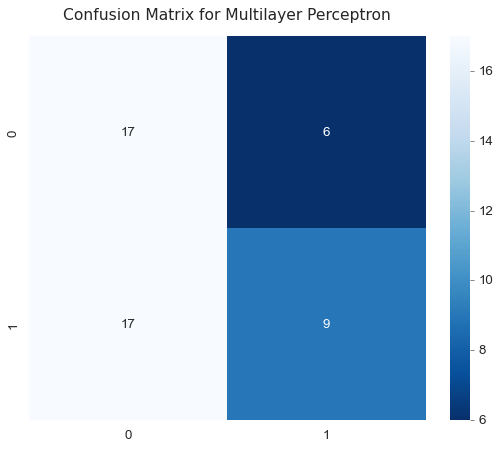

In [ ]:
# Confusion Matrix of MLP
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
sns.set_style("white")

y_pred_mlp = mlp.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Multilayer Perceptron", fontsize=14, fontname="Helvetica", y=1.03)

print(metrics.classification_report(y_test, y_pred_mlp))